In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.colors import LogNorm
import matplotlib as mpl

# Model result load-in

In [2]:
df_ngb = pd.read_csv("data/model_results.csv")
df_ngb.head()

,Unnamed: 0,actual_dele,pred_dele,error_e,actual_delsini,pred_delsini,error_sini,Des'n,e,Incl.,prope_h,propsini_h,pred_e,pred_sini,propa,prope,propsini
0,0,0.051333,0.047883,0.000732,-0.002584,-0.003377,0.000312,K08GG6Z,0.136337,18.15952,0.143651,0.320243,0.184220,0.308286,3.096944,0.187670,0.309080
1,1,-0.040941,-0.036978,0.001724,-0.011308,-0.011169,0.000243,a3916,0.205167,8.93215,0.226707,0.143824,0.168189,0.144096,2.744571,0.164226,0.143957
2,2,0.024274,0.024890,0.002030,-0.024976,-0.025101,0.000447,K19UE7F,0.218364,14.86524,0.232739,0.241083,0.243254,0.231446,2.629108,0.242638,0.231570
3,3,0.020923,0.017154,0.002157,0.007004,0.006788,0.000303,w9553,0.165092,5.29658,0.151933,0.101674,0.182246,0.099099,2.697252,0.186015,0.099315
4,4,0.020628,0.005080,0.001133,-0.019296,-0.018888,0.000508,c3003,0.038543,17.30181,0.070188,0.284629,0.043622,0.278517,3.190367,0.059171,0.278109


In [17]:
nesvorny_elements = pd.read_csv("data/nesvorny_catalog_dataset.csv")
df_ngb = pd.merge(df_ngb, nesvorny_elements[["Des'n", 'da', 'de', 'dsini']], on="Des'n", how="inner")

/tmp/ipykernel_4346/1693640868.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  nesvorny_elements = pd.read_csv("data/nesvorny_catalog_dataset.csv")


In [18]:
# Proper elements after NGBoost Model prediction
pred_e = df_ngb["pred_e"]
pred_sini = df_ngb["pred_sini"]

# Proper elements after integration
prope = df_ngb["prope"]
propsini = df_ngb["propsini"]

# Proper elements after Linear prediction
linear_e = df_ngb["prope_h"]
linear_sini = df_ngb["propsini_h"]

# Osculating elements
e = df_ngb["e"]
sini = np.sin(df_ngb["Incl."] * np.pi/180)

# RMS calculation

In [19]:
# RMS calculations
rms_nesvorny_vs_osculating_e = np.sqrt(np.median((prope - e)**2))
rms_nesvorny_vs_osculating_sini = np.sqrt(np.median((propsini - sini)**2))

rms_nesvorny_vs_linear_e = np.sqrt(np.median((prope - linear_e)**2))
rms_nesvorny_vs_linear_sini = np.sqrt(np.median((propsini - linear_sini)**2))

rms_nesvorny_vs_ngboost_e = np.sqrt(np.median((prope - pred_e)**2))
rms_nesvorny_vs_ngboost_sini = np.sqrt(np.median((propsini - pred_sini)**2))

# RMS improvement calculations
improvement_ngboost_vs_linear_e = ((rms_nesvorny_vs_linear_e - rms_nesvorny_vs_ngboost_e) / rms_nesvorny_vs_linear_e) * 100
improvement_ngboost_vs_linear_sini = ((rms_nesvorny_vs_linear_sini - rms_nesvorny_vs_ngboost_sini) / rms_nesvorny_vs_linear_sini) * 100

improvement_ngboost_vs_osculating_e = ((rms_nesvorny_vs_osculating_e - rms_nesvorny_vs_ngboost_e) / rms_nesvorny_vs_osculating_e) * 100
improvement_ngboost_vs_osculating_sini = ((rms_nesvorny_vs_osculating_sini - rms_nesvorny_vs_ngboost_sini) / rms_nesvorny_vs_osculating_sini) * 100

# Results dictionary
results = {
    'rms_nesvorny_vs_osculating_e': rms_nesvorny_vs_osculating_e,
    'rms_nesvorny_vs_osculating_sini': rms_nesvorny_vs_osculating_sini,
    'rms_nesvorny_vs_linear_e': rms_nesvorny_vs_linear_e,
    'rms_nesvorny_vs_linear_sini': rms_nesvorny_vs_linear_sini,
    'rms_nesvorny_vs_ngboost_e': rms_nesvorny_vs_ngboost_e,
    'rms_nesvorny_vs_ngboost_sini': rms_nesvorny_vs_ngboost_sini,
    'improvement_ngboost_vs_linear_e_percent': improvement_ngboost_vs_linear_e,
    'improvement_ngboost_vs_linear_sini_percent': improvement_ngboost_vs_linear_sini,
    'improvement_ngboost_vs_osculating_e_percent': improvement_ngboost_vs_osculating_e,
    'improvement_ngboost_vs_osculating_sini_percent': improvement_ngboost_vs_osculating_sini
}

results

{'rms_nesvorny_vs_osculating_e': np.float64(0.026987200000000003),
 'rms_nesvorny_vs_osculating_sini': np.float64(0.012245453247580654),
 'rms_nesvorny_vs_linear_e': np.float64(0.02706150967298132),
 'rms_nesvorny_vs_linear_sini': np.float64(0.004145326637503801),
 'rms_nesvorny_vs_ngboost_e': np.float64(0.002598665725706495),
 'rms_nesvorny_vs_ngboost_sini': np.float64(0.0006164884067992871),
 'improvement_ngboost_vs_linear_e_percent': np.float64(90.39718863762782),
 'improvement_ngboost_vs_linear_sini_percent': np.float64(85.12811026224657),
 'improvement_ngboost_vs_osculating_e_percent': np.float64(90.3707471478831),
 'improvement_ngboost_vs_osculating_sini_percent': np.float64(94.96557298178337)}

# Plot Generation

## Comparison between Osculating, Linear Prediction, and Model Prediction

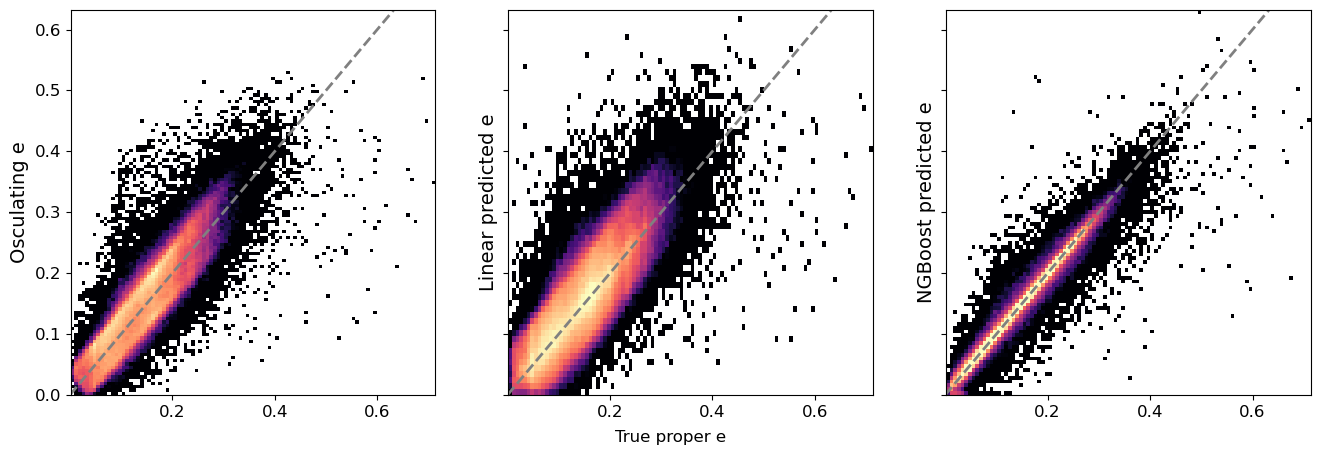

In [20]:
df_combined = pd.DataFrame({
	'propa': df_ngb['propa'],
	'e': df_ngb['e'], 
	'true_e': df_ngb['prope'],
	'linear_e': df_ngb['prope_h'],
	'ngb_e': df_ngb['pred_e'],
})

fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)
bins = 100
vmin = 10
cmap = mpl.cm.magma
norm = LogNorm(vmin=vmin)

data = [
	(df_combined['true_e'], df_combined['e'], "Osculating"),
	(df_combined['true_e'], df_combined['linear_e'], "Linear"),
	(df_combined['true_e'], df_combined['ngb_e'], "NGB model"),
]

for i, (x, y, label) in enumerate(data):
	ax = axs[i]
	x = x[(x <= 1) & (y <= 1)]
	y = y[(x <= 1) & (y <= 1)]
	h = ax.hist2d(x, y, bins=bins, norm=norm, cmap=cmap)

	minval = min(x.min(), y.min())
	maxval = max(x.max(), y.max())
	ax.plot([minval, maxval], [minval, maxval], ls = 'dashed', linewidth=2, color = "grey")
	
	if i == 0:
		ax.set_ylabel("Osculating e", fontsize=14)
	elif i == 1:
		ax.set_ylabel("Linear predicted e", fontsize=14)
	else:
		ax.set_ylabel("NGBoost predicted e", fontsize=14)

	ax.tick_params(axis='both', labelsize=12)
	h_vals, xedges, yedges = np.histogram2d(x, y, bins=bins)
	X, Y = np.meshgrid((xedges[:-1] + xedges[1:])/2, (yedges[:-1] + yedges[1:])/2)

fig.supxlabel("True proper e")
plt.show()

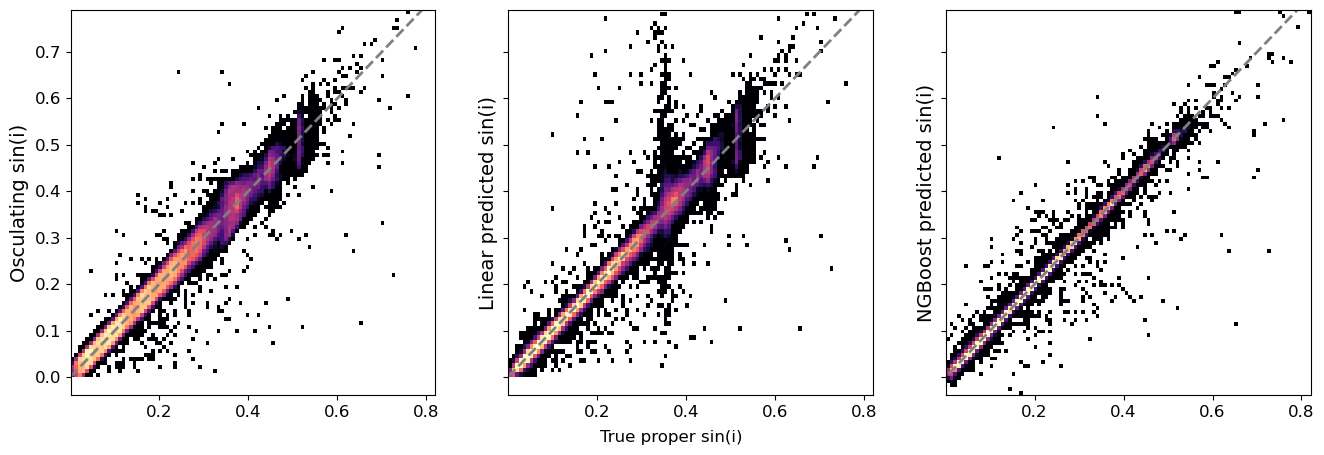

In [21]:
df_combined = pd.DataFrame({
	'propa': df_ngb['propa'],
	'sini': np.sin(df_ngb['Incl.'] * np.pi/180), 
	'true_sini': df_ngb['propsini'],
	'linear_sini': df_ngb['propsini_h'],
	'ngb_sini': df_ngb['pred_sini']
})

fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharex=True, sharey=True)
bins = 100
vmin = 10
cmap = mpl.cm.magma
norm = LogNorm(vmin=vmin)

data = [
	(df_combined['true_sini'], df_combined['sini'], "Osculating"),
	(df_combined['true_sini'], df_combined['linear_sini'], "Linear"),
	(df_combined['true_sini'], df_combined['ngb_sini'], "NGB model"),
]

for i, (x, y, label) in enumerate(data):
	ax = axs[i]
	x = x[(x <= 1) & (y <= 1)]
	y = y[(x <= 1) & (y <= 1)]
	h = ax.hist2d(x, y, bins=bins, norm=norm, cmap=cmap)

	minval = min(x.min(), y.min())
	maxval = max(x.max(), y.max())
	ax.plot([minval, maxval], [minval, maxval], ls = 'dashed', linewidth=2, color = "grey")
	
	if i == 0:
		ax.set_ylabel("Osculating sin(i)", fontsize=14)
	elif i == 1:
		ax.set_ylabel("Linear predicted sin(i)", fontsize=14)
	else:
		ax.set_ylabel("NGBoost predicted sin(i)", fontsize=14)

	ax.tick_params(axis='both', labelsize=12)
	h_vals, xedges, yedges = np.histogram2d(x, y, bins=bins)
	X, Y = np.meshgrid((xedges[:-1] + xedges[1:])/2, (yedges[:-1] + yedges[1:])/2)

fig.supxlabel("True proper sin(i)")
plt.show()

## Nesvorny Plots replicate

In [22]:
# Define sample with high errors

def calculate_d(a_p, delta_a_p, delta_e_p, delta_sin_i_p):
	numerator = 3e4  # 3 × 10^4 m/s
	denominator = math.sqrt(a_p)
	term1 = (delta_a_p / a_p) ** 2
	term2 = 2 * (delta_e_p ** 2)
	term3 = 2 * (delta_sin_i_p ** 2)
	inside_sqrt = (5 / 4) * term1 + term2 + term3
	d = (numerator / denominator) * math.sqrt(inside_sqrt)
	return d

df_ngb['d'] = df_ngb.apply(lambda row: calculate_d(row['propa'], row['da'], row['de'], row['dsini']), axis = 1)
df_ngb_high = df_ngb[df_ngb['d'] > 100]

In [23]:
# MMR a values
a_jupiter = 5.204
a_mars = 1.524

resonances = {
	"3:1": ("Jupiter", 3, 1),
	"12:5": ("Jupiter", 12, 5),
	"13:5": ("Jupiter", 13, 5),
	"9:4": ("Jupiter", 9, 4),
	"11:5": ("Jupiter", 11, 5),
	"2:1": ("Jupiter", 2, 1),
	"1:2": ("Mars", 1, 2),
	"7:2": ("Jupiter", 7, 2),
	"4:7": ("Mars", 4, 7)
}

# Function to calculate semi-major axis for a resonance
def compute_resonance_axis(p, q, a_primary):
	return a_primary * (q / p) ** (2/3)

# Store results
a_values = {}
for label, (planet, p, q) in resonances.items():
	if planet == "Jupiter":
		a = compute_resonance_axis(p, q, a_jupiter)
		a_values[label] = a
	else:
		a = compute_resonance_axis(p, q, a_mars)
		a_values[label] = a
a_values["5:2:2"] = 3.17
print(a_values)

{'3:1': 2.501822254626584, '12:5': 2.903107560189675, '13:5': 2.752253224713012, '9:4': 3.030741825658466, '11:5': 3.076489949733917, '2:1': 3.27831457182646, '1:2': 2.4191992031995357, '7:2': 2.257487001377278, '4:7': 2.2131473644877713, '5:2:2': 3.17}


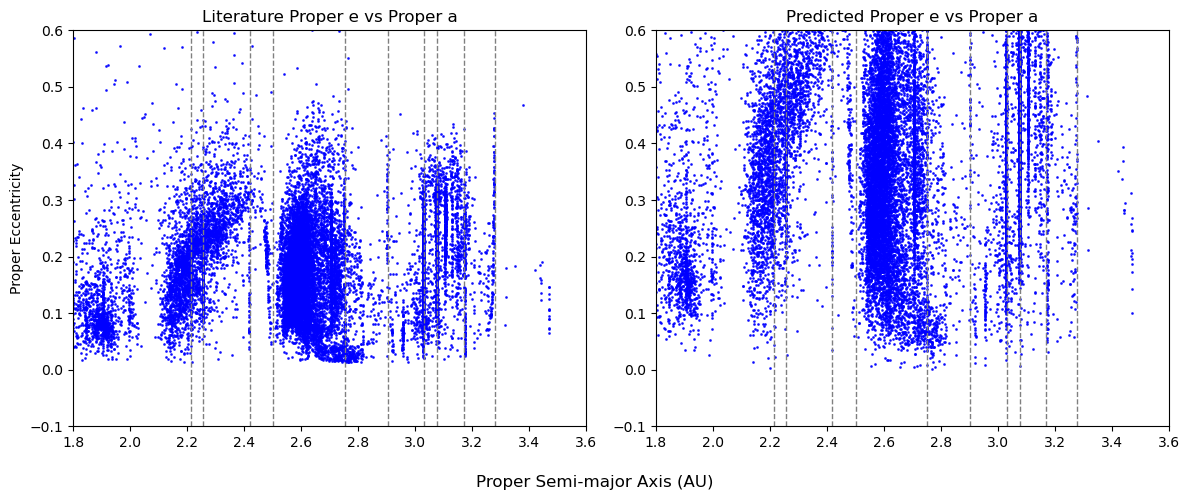

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Left Plot: Literature published proper a vs proper e
axs[0].scatter(
    df_ngb_high["propa"],
    df_ngb_high["prope"],
    alpha=0.8,
    s=1,
    color='blue',
    label="Original"
)
axs[0].set_ylabel("Proper Eccentricity")
axs[0].set_xlim(1.8, 3.6)
axs[0].set_ylim(-0.1, 0.6)
axs[0].set_title("Literature Proper e vs Proper a")

# Right Plot: Model predicted proper a vs proper e
y = df_ngb_high["pred_e"] + df_ngb_high["e"]
axs[1].scatter(
    df_ngb_high["propa"],
    y,
    alpha=0.8,
    s=1,
    color='blue',
    label="NGB prediction"
)
axs[1].set_xlim(1.8, 3.6)
axs[1].set_ylim(-0.1, 0.6)
axs[1].set_title("Predicted Proper e vs Proper a")

for ax in axs:
    for label, a in a_values.items():
        ax.axvline(a, linestyle='--', linewidth=1, color='grey')

fig.supxlabel("Proper Semi-major Axis (AU)")
plt.tight_layout()
plt.show()


KeyError: 'pred_inc'

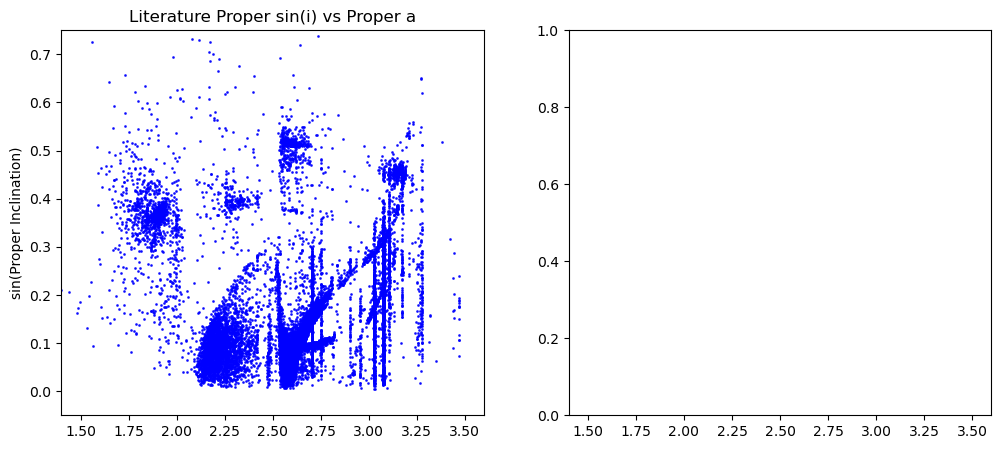

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Left Plot: Literature published proper a vs proper e
axs[0].scatter(
    df_ngb_high["propa"],
    df_ngb_high["propsini"],
    alpha=0.8,
    s=1,
    color='blue',
)

axs[0].set_ylabel("sin(Proper Inclination)")
axs[0].set_xlim(1.4, 3.6)
axs[0].set_ylim(-0.05, 0.75)
axs[0].set_title("Literature Proper sin(i) vs Proper a")

# Right Plot: Model predicted proper a vs proper e
y = df_ngb_high["pred_inc"] + np.sin((df_ngb_high["Incl."] * np.pi/180))
axs[1].scatter(
    df_ngb_high["propa"],
    y,
    alpha=0.8,
    s=1,
    color='blue',
)

axs[1].set_xlim(1.4, 3.6)
axs[1].set_ylim(-0.05, 0.75)
axs[1].set_title("Predicted Proper sin(i) vs Proper a")

fig.supxlabel("Proper Semi-major Axis (AU)")
plt.tight_layout()
plt.show()

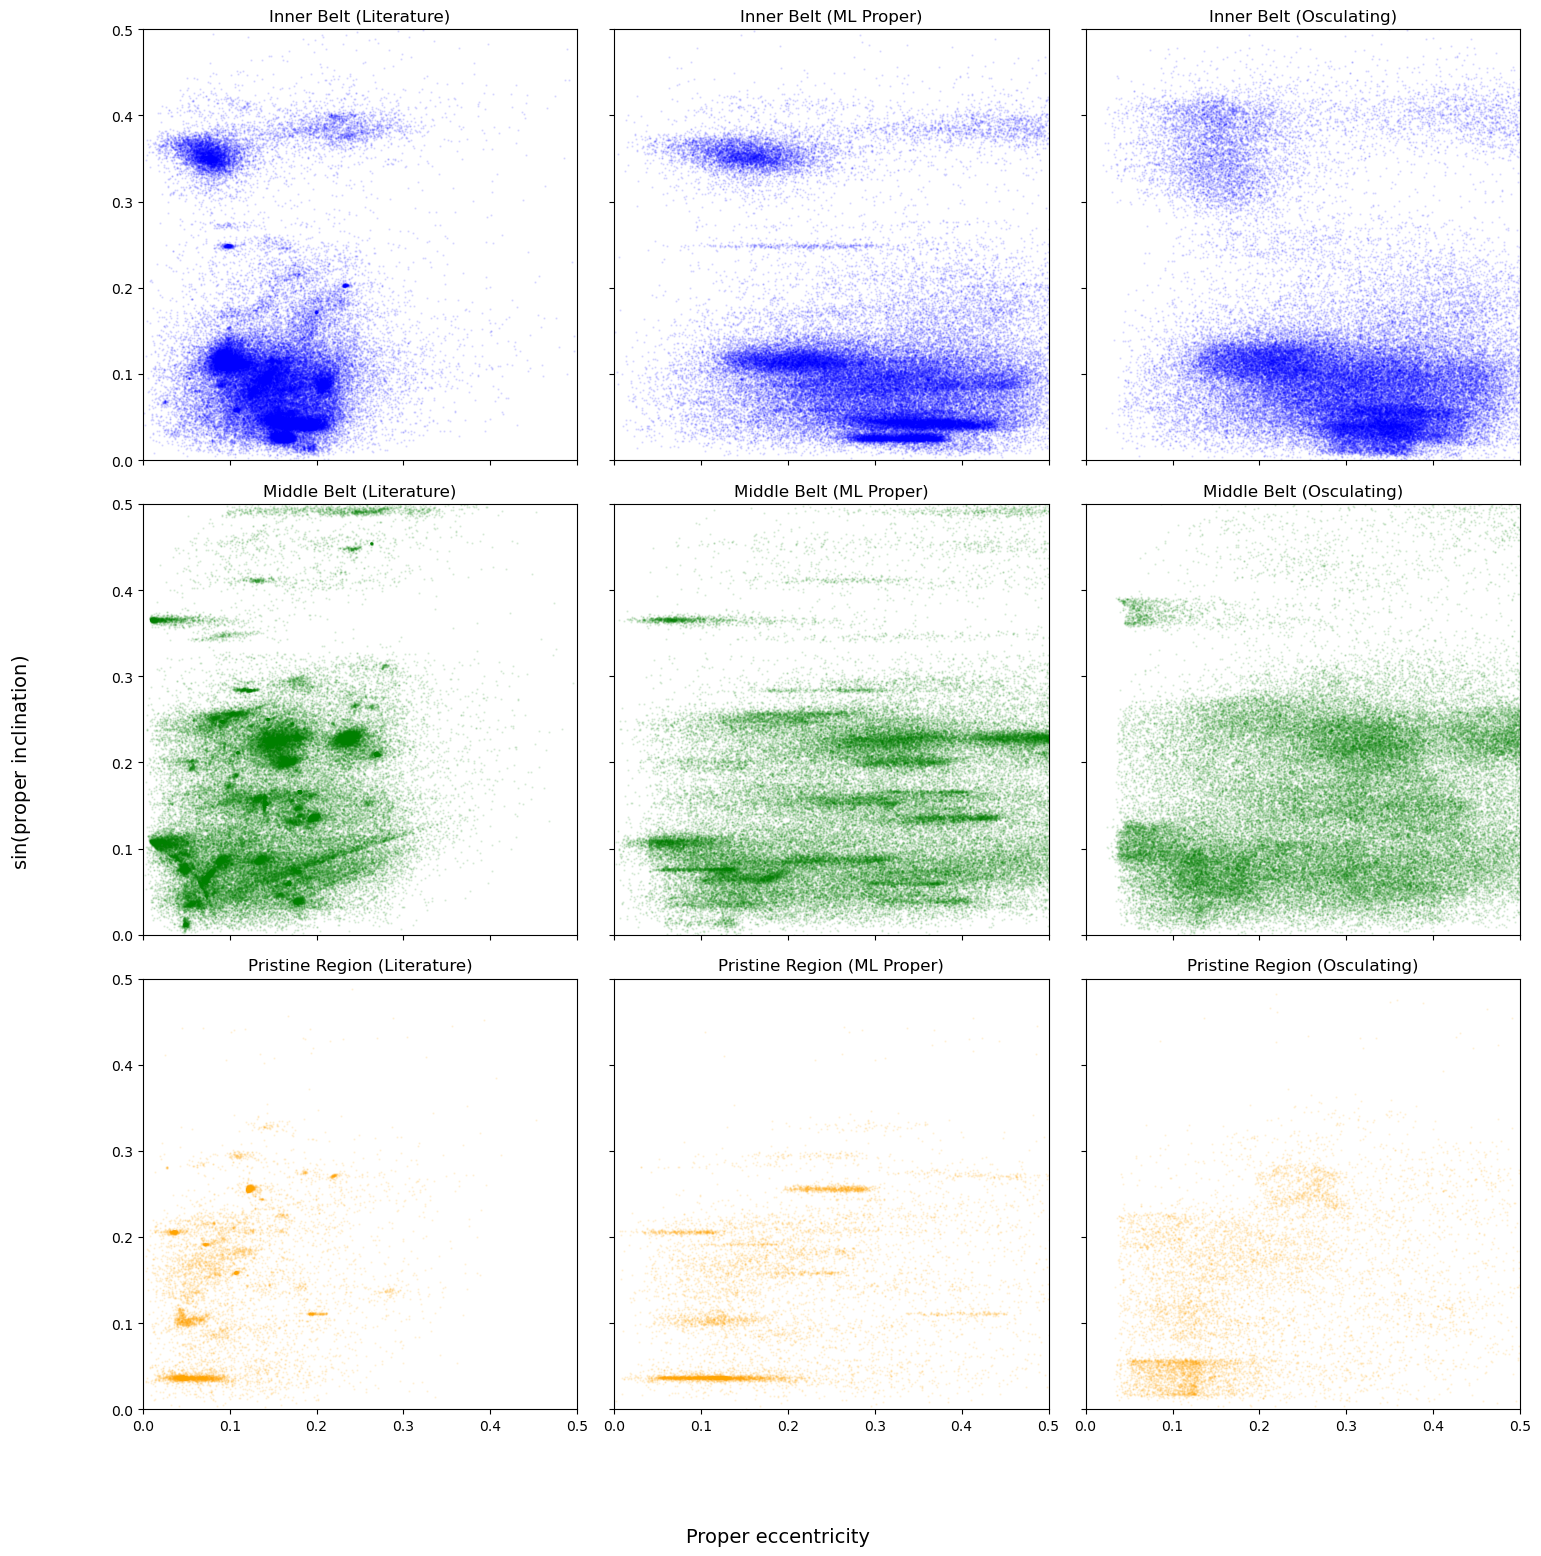

In [26]:
# Define belt regions
belts = {
    'Inner Belt': {'df': df_ngb[df_ngb["propa"] < 2.5], 'color': 'blue'},
    'Middle Belt': {'df': df_ngb[(df_ngb["propa"] > 2.5) & (df_ngb["propa"] < 2.825)], 'color': 'green'},
    'Pristine Region': {'df': df_ngb[(df_ngb["propa"] > 2.825) & (df_ngb["propa"] < 2.958)], 'color': 'orange'}
}

fig, ax = plt.subplots(3, 3, figsize=(16, 16), sharex=True, sharey=True)

for i, (belt_name, belt_data) in enumerate(belts.items()):
    df = belt_data['df']
    color = belt_data['color']
    
    ax[i, 0].scatter(df["prope"], np.sin(df["propsini"]), 
                    s=0.5, alpha=0.1, color=color)
    ax[i, 0].set_title(f"{belt_name} (Literature)")

    ax[i, 1].scatter(df["pred_e"] + df["e"], np.sin(df["pred_sini"]), 
                    s=0.5, alpha=0.1, color=color)
    ax[i, 1].set_title(f"{belt_name} (ML Proper)")

    ax[i, 2].scatter(df["prope"] + df["e"], np.sin(df["Incl."] * np.pi / 180), 
                    s=0.5, alpha=0.1, color=color)
    ax[i, 2].set_title(f"{belt_name} (Osculating)")

for row in ax:
    for axis in row:
        axis.set_xlim(0, 0.5)
        axis.set_ylim(0, 0.5)

fig.supxlabel("Proper eccentricity", fontsize=14)
fig.supylabel(r"$\sin(\mathrm{proper\ inclination})$", fontsize=14)
plt.tight_layout(rect=[0.05, 0.05, 0.98, 0.98])
plt.show()

Text(0.5, 1.0, 'Predicted Proper e vs Proper a')

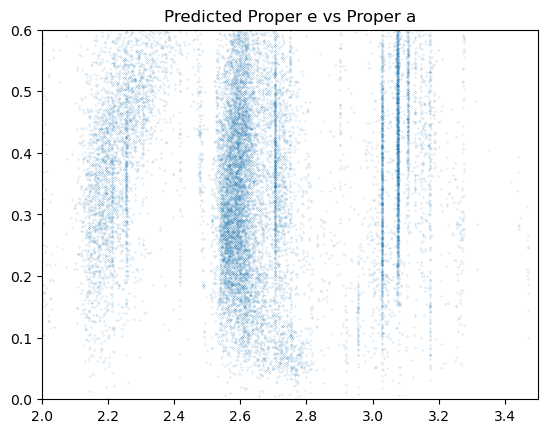

In [27]:

# Right Plot: Model predicted proper a vs proper e
y = df_ngb_high["pred_e"] + df_ngb_high["e"]
plt.scatter(
    df_ngb_high["propa"],
    y,
    # df_ngb_high["prope"],
    s=0.01,
)
plt.xlim(2, 3.5)
plt.ylim(0, 0.6)
plt.title("Predicted Proper e vs Proper a")